In [1]:
import pandas as pd
import numpy as np

#plotting
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline

#SCORE CHECKERS-Classifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

#Model building libraries
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier


#EDA libraries
from scipy.stats import zscore
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform

#Hyperparametertuning libraries
from sklearn.model_selection import GridSearchCV

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")


#libraries for regularisation
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV

#Library for saving data
import pickle


In [2]:
df=pd.read_csv('Telecom_customer_churn.csv')

#show all columns in dataframe
pd.set_option('display.max_columns', None)

df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Data Description

Observations:

1.The dataset has 21 columns 

2.There are both categorical and numerical data

3.Customer churn is when a company’s customers stop doing business with that company.It is categorical data. It consists of Yes and No. Hence here we would be using binary classifications.
Yes means they have stopped and No means they havnt

4.The data consists of features which has yes/no categorical and also more than two categories

Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base

# Statistical data analysis

In [3]:
df.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531,2
top,6457-GIRWB,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


Observations:

1.There is no column with single unique values

2.Null values is not present as all of them have 7043 datas

3.Outliers are seen in 	SeniorCitizen,tenure and MonthlyCharges

labels count: 
  No     5174
Yes    1869
Name: Churn, dtype: int64


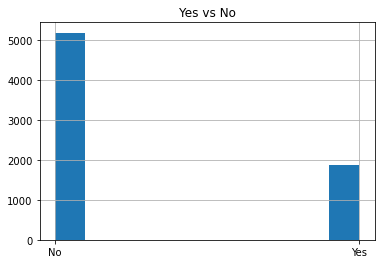

In [4]:
# checking for class imbalance
print("labels count: \n ",df["Churn"].value_counts())

df["Churn"].hist(grid=True)
plt.title("Yes vs No")
plt.show()


class imbalance is present and we would need to balance the class

# Graphical data analysis

**1.Analysing the Label**

In [5]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()

#encoding the Churn  column
df["Churn"]=lab_enc.fit_transform(df['Churn'])


In [6]:
df["Churn"]

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [7]:
#understanding the relationship between independent variable with label
data_corr=df.corr()
data_corr["Churn"].sort_values(ascending=False)

Churn             1.000000
MonthlyCharges    0.193356
SeniorCitizen     0.150889
tenure           -0.352229
Name: Churn, dtype: float64

0 is No

1 is Yes

**2.Analysing the relationship between categorical features and the label**

In [8]:
#finding categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

In [9]:
df["SeniorCitizen"]=df["SeniorCitizen"].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


--------- gender vs Churn---------------------------------------------------------------------------------


gender
Male      3555
Female    3488
Name: gender, dtype: int64




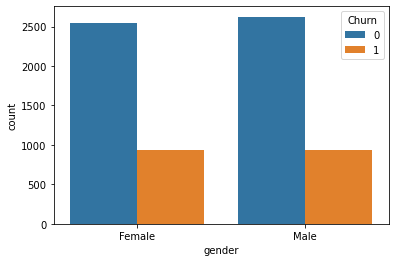

<Figure size 432x216 with 0 Axes>

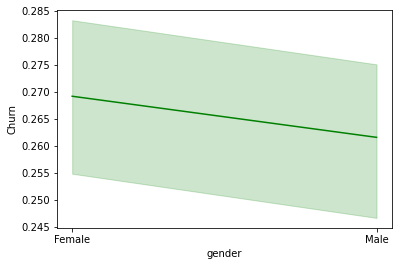

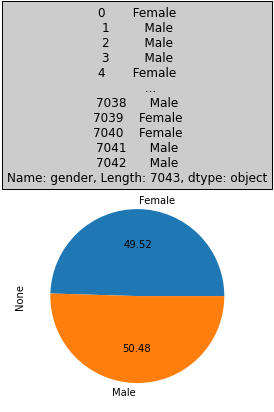



--------- SeniorCitizen vs Churn---------------------------------------------------------------------------------


SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64




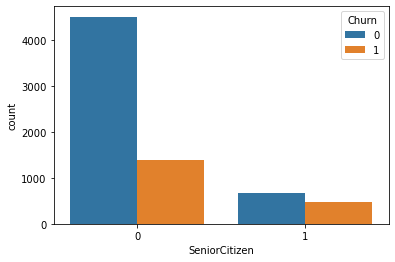

<Figure size 432x216 with 0 Axes>

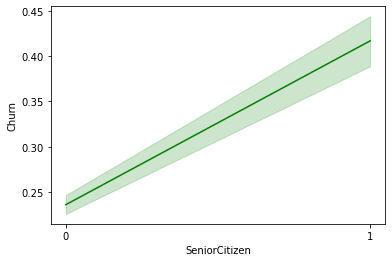

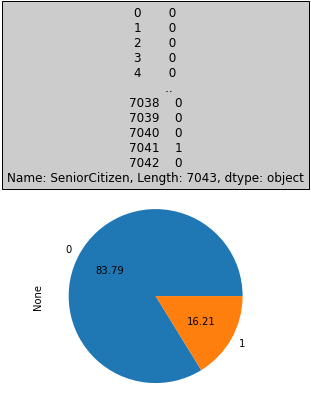



--------- Partner vs Churn---------------------------------------------------------------------------------


Partner
No     3641
Yes    3402
Name: Partner, dtype: int64




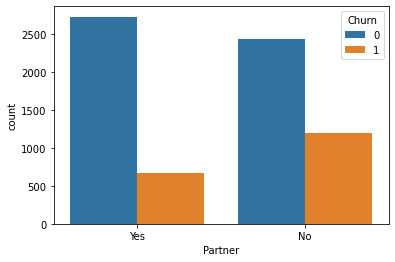

<Figure size 432x216 with 0 Axes>

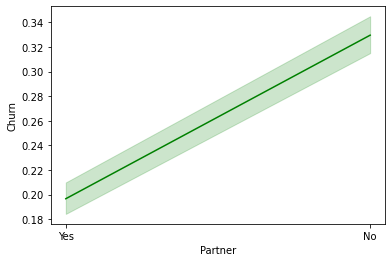

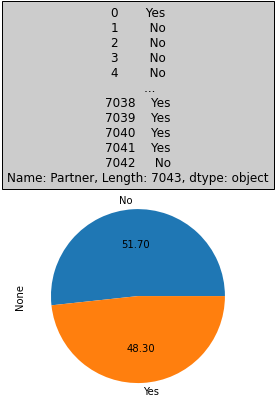



--------- Dependents vs Churn---------------------------------------------------------------------------------


Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64




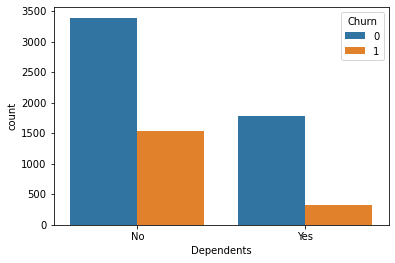

<Figure size 432x216 with 0 Axes>

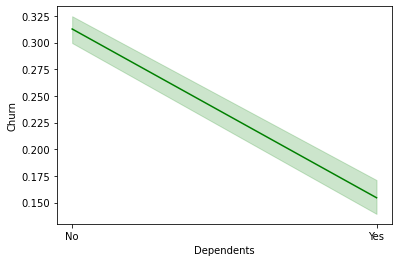

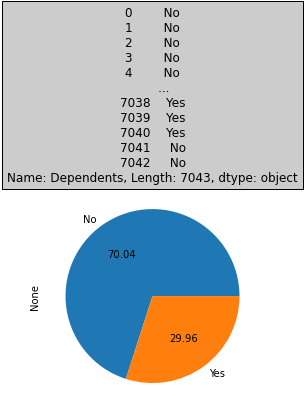



--------- PhoneService vs Churn---------------------------------------------------------------------------------


PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64




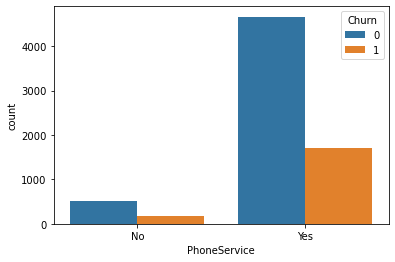

<Figure size 432x216 with 0 Axes>

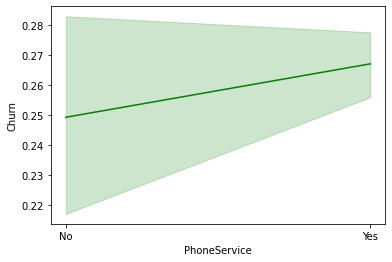

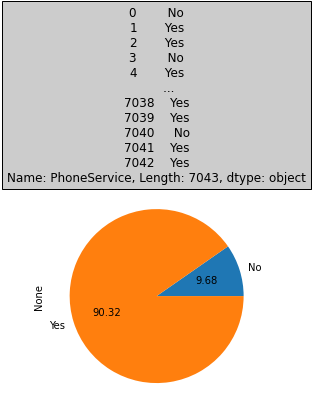



--------- MultipleLines vs Churn---------------------------------------------------------------------------------


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64




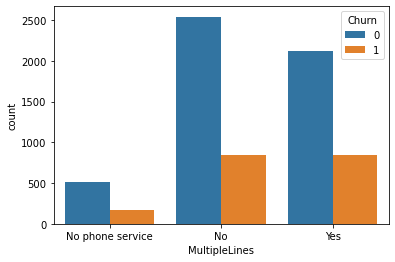

<Figure size 432x216 with 0 Axes>

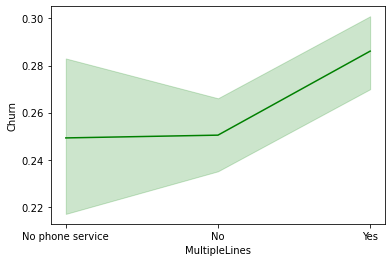

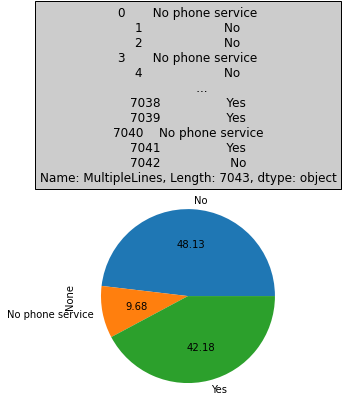



--------- InternetService vs Churn---------------------------------------------------------------------------------


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64




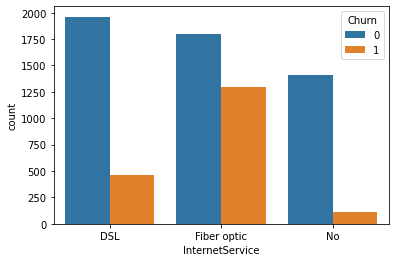

<Figure size 432x216 with 0 Axes>

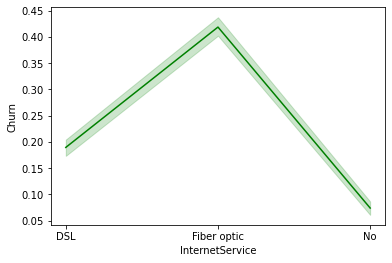

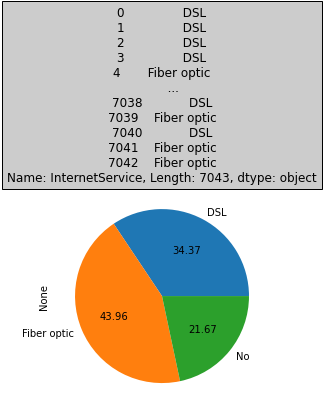



--------- OnlineSecurity vs Churn---------------------------------------------------------------------------------


OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64




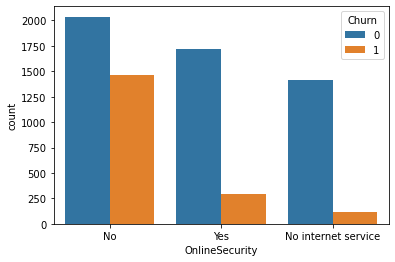

<Figure size 432x216 with 0 Axes>

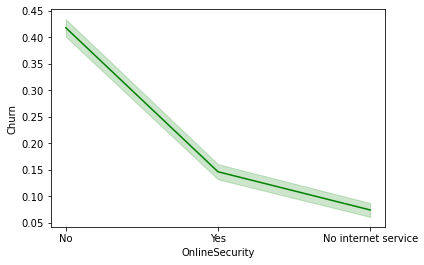

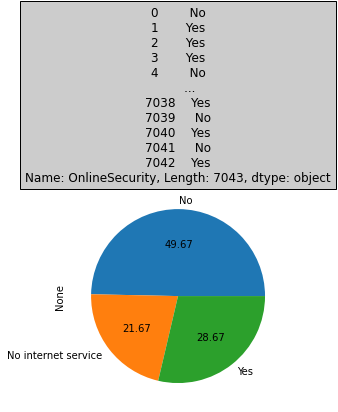



--------- OnlineBackup vs Churn---------------------------------------------------------------------------------


OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64




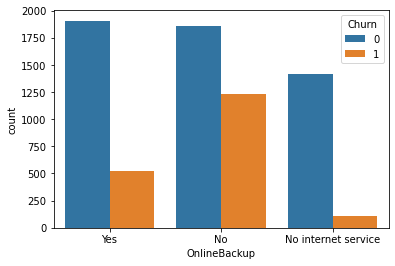

<Figure size 432x216 with 0 Axes>

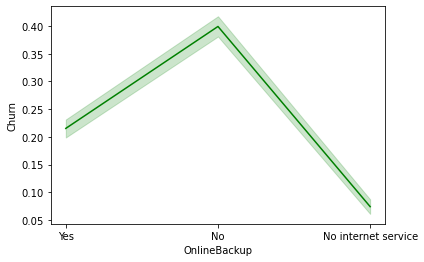

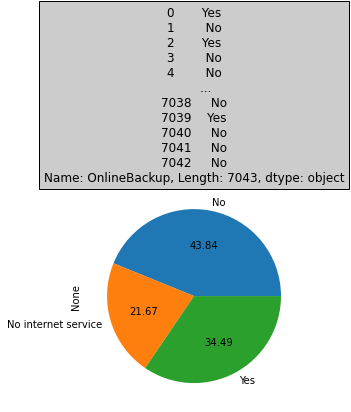



--------- DeviceProtection vs Churn---------------------------------------------------------------------------------


DeviceProtection
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64




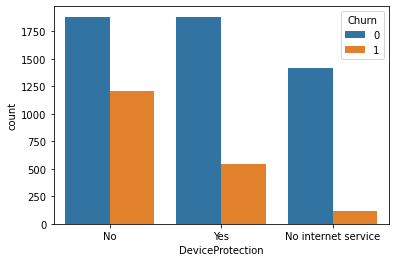

<Figure size 432x216 with 0 Axes>

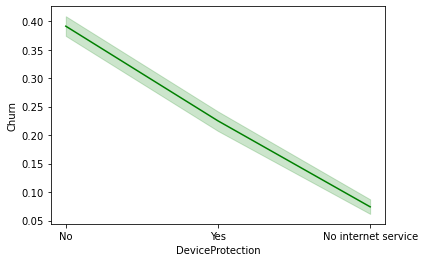

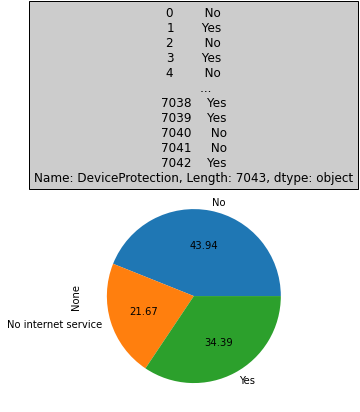



--------- TechSupport vs Churn---------------------------------------------------------------------------------


TechSupport
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64




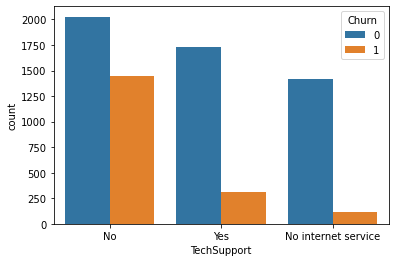

<Figure size 432x216 with 0 Axes>

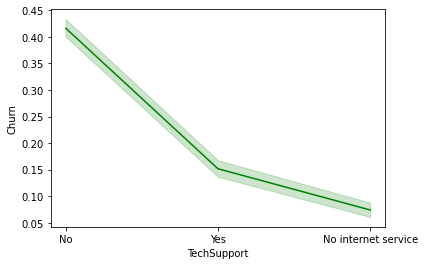

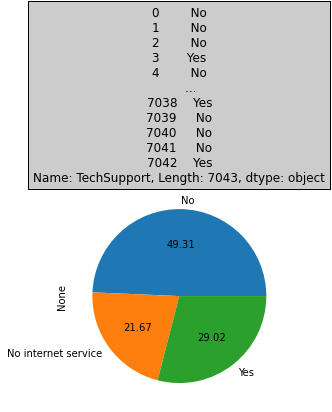



--------- StreamingTV vs Churn---------------------------------------------------------------------------------


StreamingTV
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64




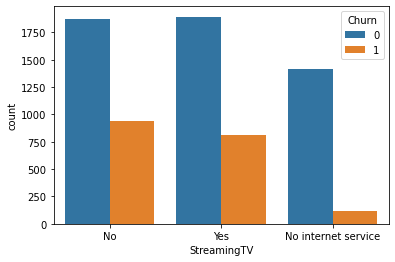

<Figure size 432x216 with 0 Axes>

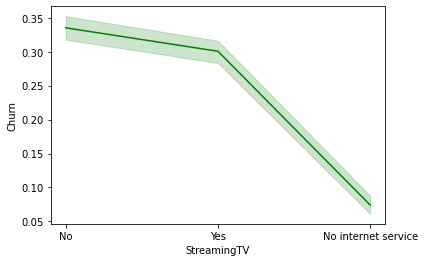

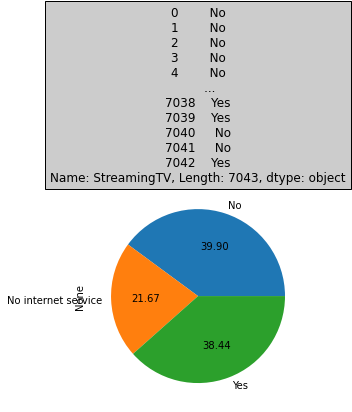



--------- StreamingMovies vs Churn---------------------------------------------------------------------------------


StreamingMovies
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64




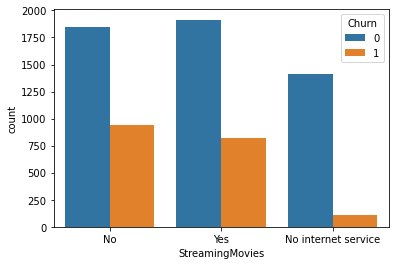

<Figure size 432x216 with 0 Axes>

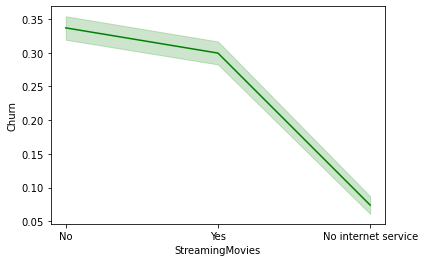

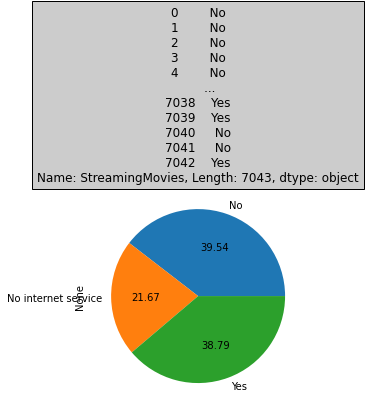



--------- Contract vs Churn---------------------------------------------------------------------------------


Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64




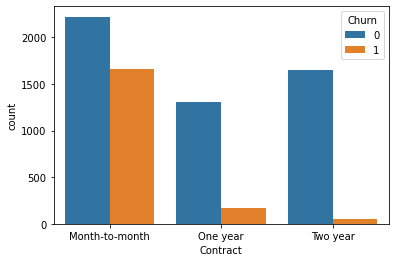

<Figure size 432x216 with 0 Axes>

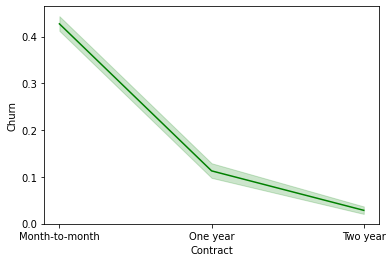

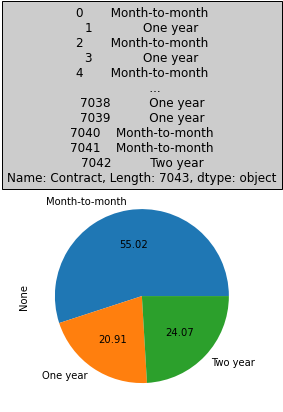



--------- PaperlessBilling vs Churn---------------------------------------------------------------------------------


PaperlessBilling
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64




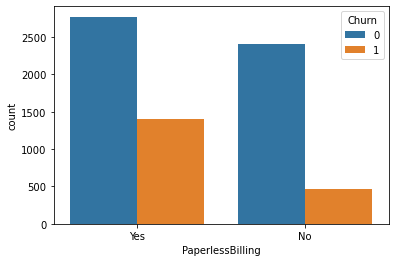

<Figure size 432x216 with 0 Axes>

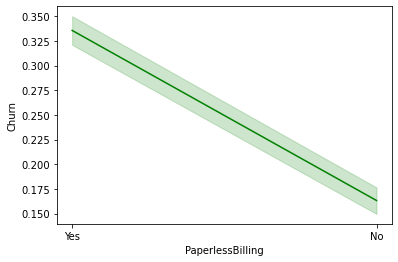

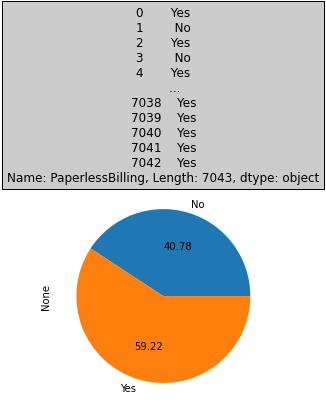



--------- PaymentMethod vs Churn---------------------------------------------------------------------------------


PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64




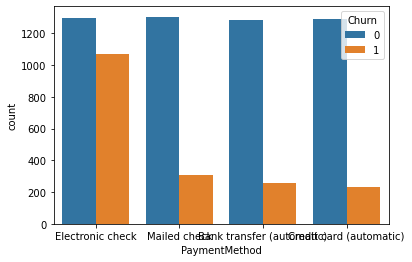

<Figure size 432x216 with 0 Axes>

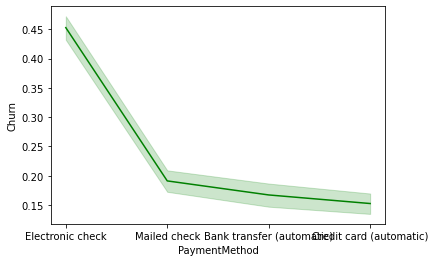

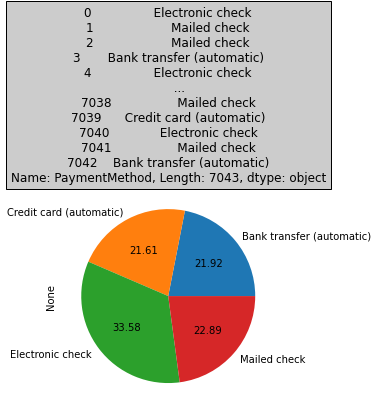

In [10]:
import matplotlib.gridspec as gridspec
gs1 = gridspec.GridSpec(2, 1)

def relationwithlabel(x):
    print(x.value_counts())
    print("\n")
    
    #countplot with hue label
    sns.countplot(x=x, hue='Churn',data = df)
    plt.figure(figsize=(6,3))
    plt.show()
    
    sns.lineplot(x=x,y="Churn",data=df, color='green')
    plt.show()
    
    
    df.groupby(x).size().plot(kind='pie', autopct='%.2f')
    plt.title(str(x),bbox={'facecolor':'0.8', 'pad':5})
    plt.show()
    
    #plt.xticks(rotation = 45, ha = 'right')
    #plt.legend(title = 'Number', bbox_to_anchor = (1, 1))          

categorical_columns=['gender','SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

for column_name in categorical_columns:
    print("---------",column_name,"vs Churn---------------------------------------------------------------------------------")
    print("\n")
    print(str(column_name))
    relationwithlabel(df[str(column_name)])
    print("\n")
    

--------- gender vs Churn---------------------------------------------------------------------------------


gender


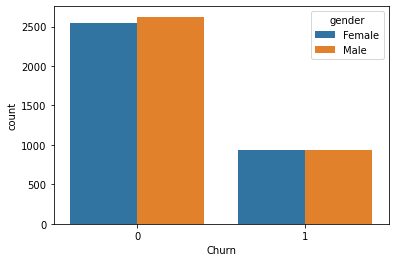



--------- SeniorCitizen vs Churn---------------------------------------------------------------------------------


SeniorCitizen


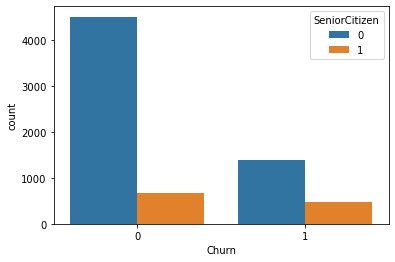



--------- Partner vs Churn---------------------------------------------------------------------------------


Partner


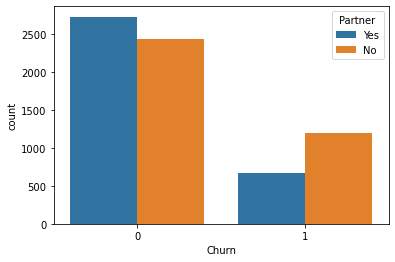



--------- Dependents vs Churn---------------------------------------------------------------------------------


Dependents


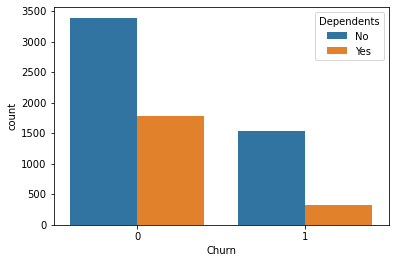



--------- PhoneService vs Churn---------------------------------------------------------------------------------


PhoneService


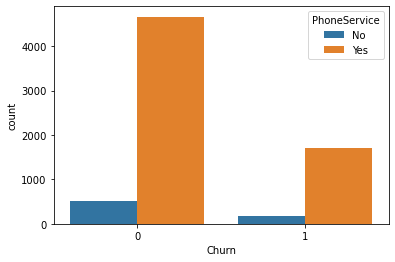



--------- MultipleLines vs Churn---------------------------------------------------------------------------------


MultipleLines


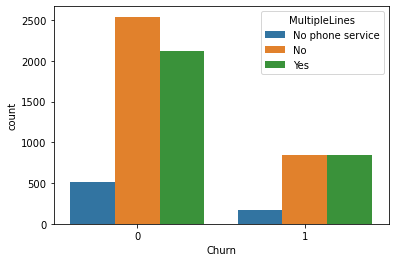



--------- InternetService vs Churn---------------------------------------------------------------------------------


InternetService


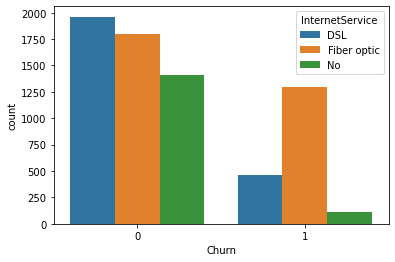



--------- OnlineSecurity vs Churn---------------------------------------------------------------------------------


OnlineSecurity


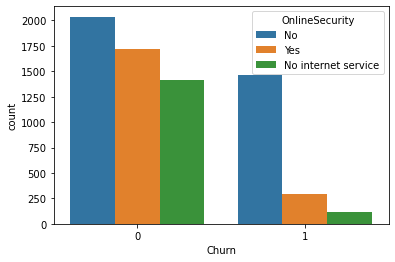



--------- OnlineBackup vs Churn---------------------------------------------------------------------------------


OnlineBackup


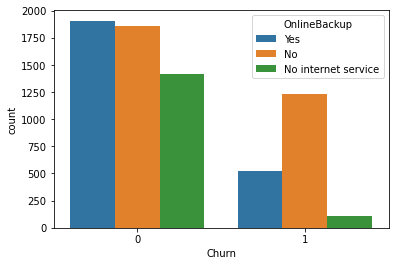



--------- DeviceProtection vs Churn---------------------------------------------------------------------------------


DeviceProtection


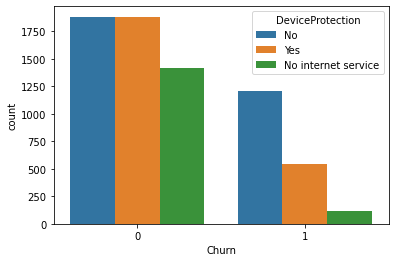



--------- TechSupport vs Churn---------------------------------------------------------------------------------


TechSupport


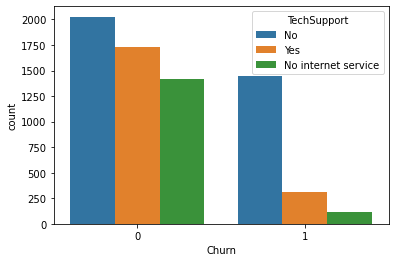



--------- StreamingTV vs Churn---------------------------------------------------------------------------------


StreamingTV


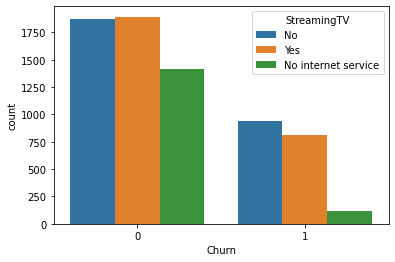



--------- StreamingMovies vs Churn---------------------------------------------------------------------------------


StreamingMovies


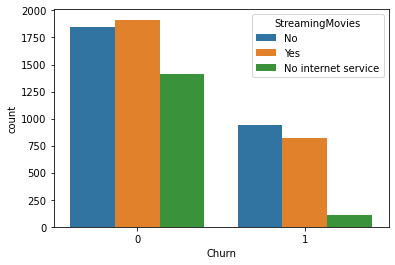



--------- Contract vs Churn---------------------------------------------------------------------------------


Contract


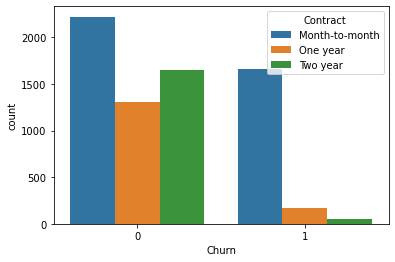



--------- PaperlessBilling vs Churn---------------------------------------------------------------------------------


PaperlessBilling


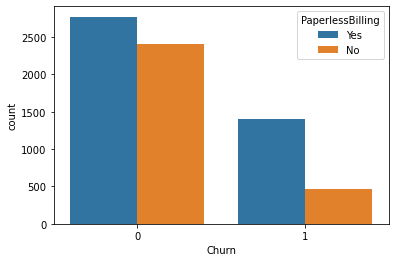



--------- PaymentMethod vs Churn---------------------------------------------------------------------------------


PaymentMethod


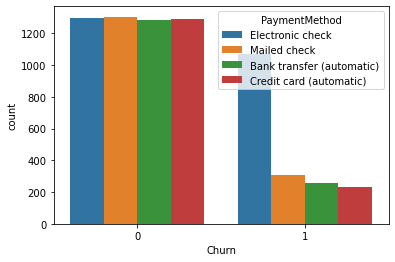

In [11]:
#countplot with hue features
def count_plot_categorical(x):
    sns.countplot(x='Churn',hue=x,data=df)
    plt.show()
    
for column_name in categorical_columns:
    print("---------",column_name,"vs Churn---------------------------------------------------------------------------------")
    print("\n")
    print(str(column_name))
    count_plot_categorical(df[str(column_name)])
    print("\n")
    

1. There is almost equal number of male and female but,More number of females have churned, hence more attention might need to be given into Female to retain them

2. There is Less Senior Citizens among the group and within the senior citizens churning is less, hence we would need to focus on the younger group to reduce the number of churn through various technolgies and innovations they can more relate to

3. Half of them are partners and the other half are not partners

4. Churning is occuring more among the customers who arent partners. Hence more amount of marketing would need to brough among non partner to make them a partner or build their trust and affinity to the product

5. There are more people with no dependents

6. If the customer has a dependent, there can be seen a higher chance to churn

7. 90% of them have phone services

8. People who dont have phone service is more likely to churn

9. Multiple lines are present among 42%, Only single lines are present among 47% and No phone service is among 9.7%

10. Highest people are churning if they have multiple line. There is almost equal churning in single line and No phone service

11. Fibre optics is used by maximum respondents

12. Highest churning is seen for People using Fibre Optic

13. There is not online security among 59

14. Churning is highest where there is no online security. Having a online security is more important than having internet service

15. Online backup is not present among 43% respondents

16. Highest churning can be seen when there is no online backup. 

17. Device protection is not present in 43% employees

18. There is highest churning when there is no Device Protection. Hence Having a Device Protection is more important than having internet service

19. There is highest churning when there is no Device Protection. Hence Having a Device Protection is more important than having internet service

20. Tech support is not present among 49% employees

21. There is highest churning when there is no tech support. Hence Having a tech support is more important than having internet service

22. Streaming TV is not present among 40% emplyees

23. Having or not having streaming TV does not contribute much towards churning. Both who had and didnt have Streaming TV have almost equally churned

24. Online backup is not present among 43% employees

25. Having or not having streaming movies does not contribute much towards churning. Both who had and didnt have Streaming movies have almost equally churned

26. 54.88% have month to month respondents

27. Churning is highest among month to month contracts

28. Paperless billig is among 60% employees and churning is highest among them

29. Electronic checque is used by 34% employees and churning is highest among them

**3.Analysing the relationship between numerical features and label**

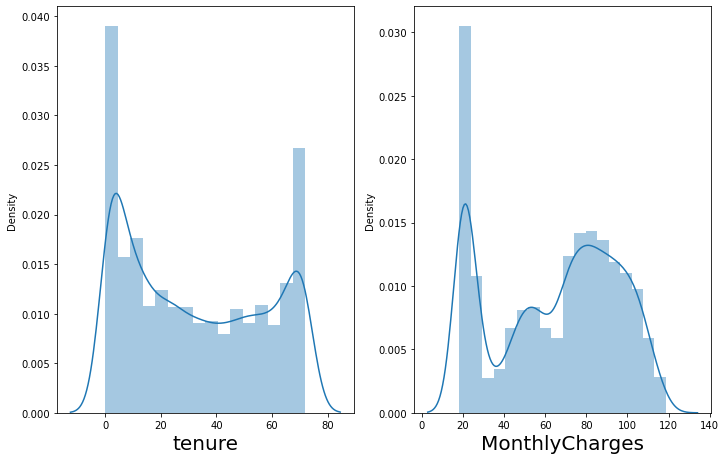

In [12]:
x = df[[ 'tenure', 'MonthlyCharges']].copy()
y=df['Churn']
#understanding relationship between features and label
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=16:
       ax=plt.subplot(4,4,plotnumber)
       sns.distplot(x[column])         #distribution plot- we use for continous data
       plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()
plt.show()



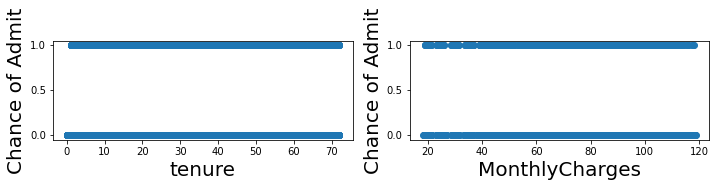

In [13]:
#visualising the relationship
plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=15:
        X=plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Chance of Admit',fontsize=20)
    plotnumber+=1
plt.tight_layout()
plt.show()

Tenure is between 0 to 70 and monthly charges is between 20 to 118

# Feature Engineering

In [14]:
#customerID doesnt play any role, hence dropping it
df=df.drop(columns=["customerID"])

In [15]:
# total charges has 6531 unique values, hence dropping them 
df=df.drop(columns=["TotalCharges"])

# EDA

# 1.Dealing with continous data

In [16]:
#removing duplicate values
df.drop_duplicates(inplace=True)

Checking skewness and removing outliers

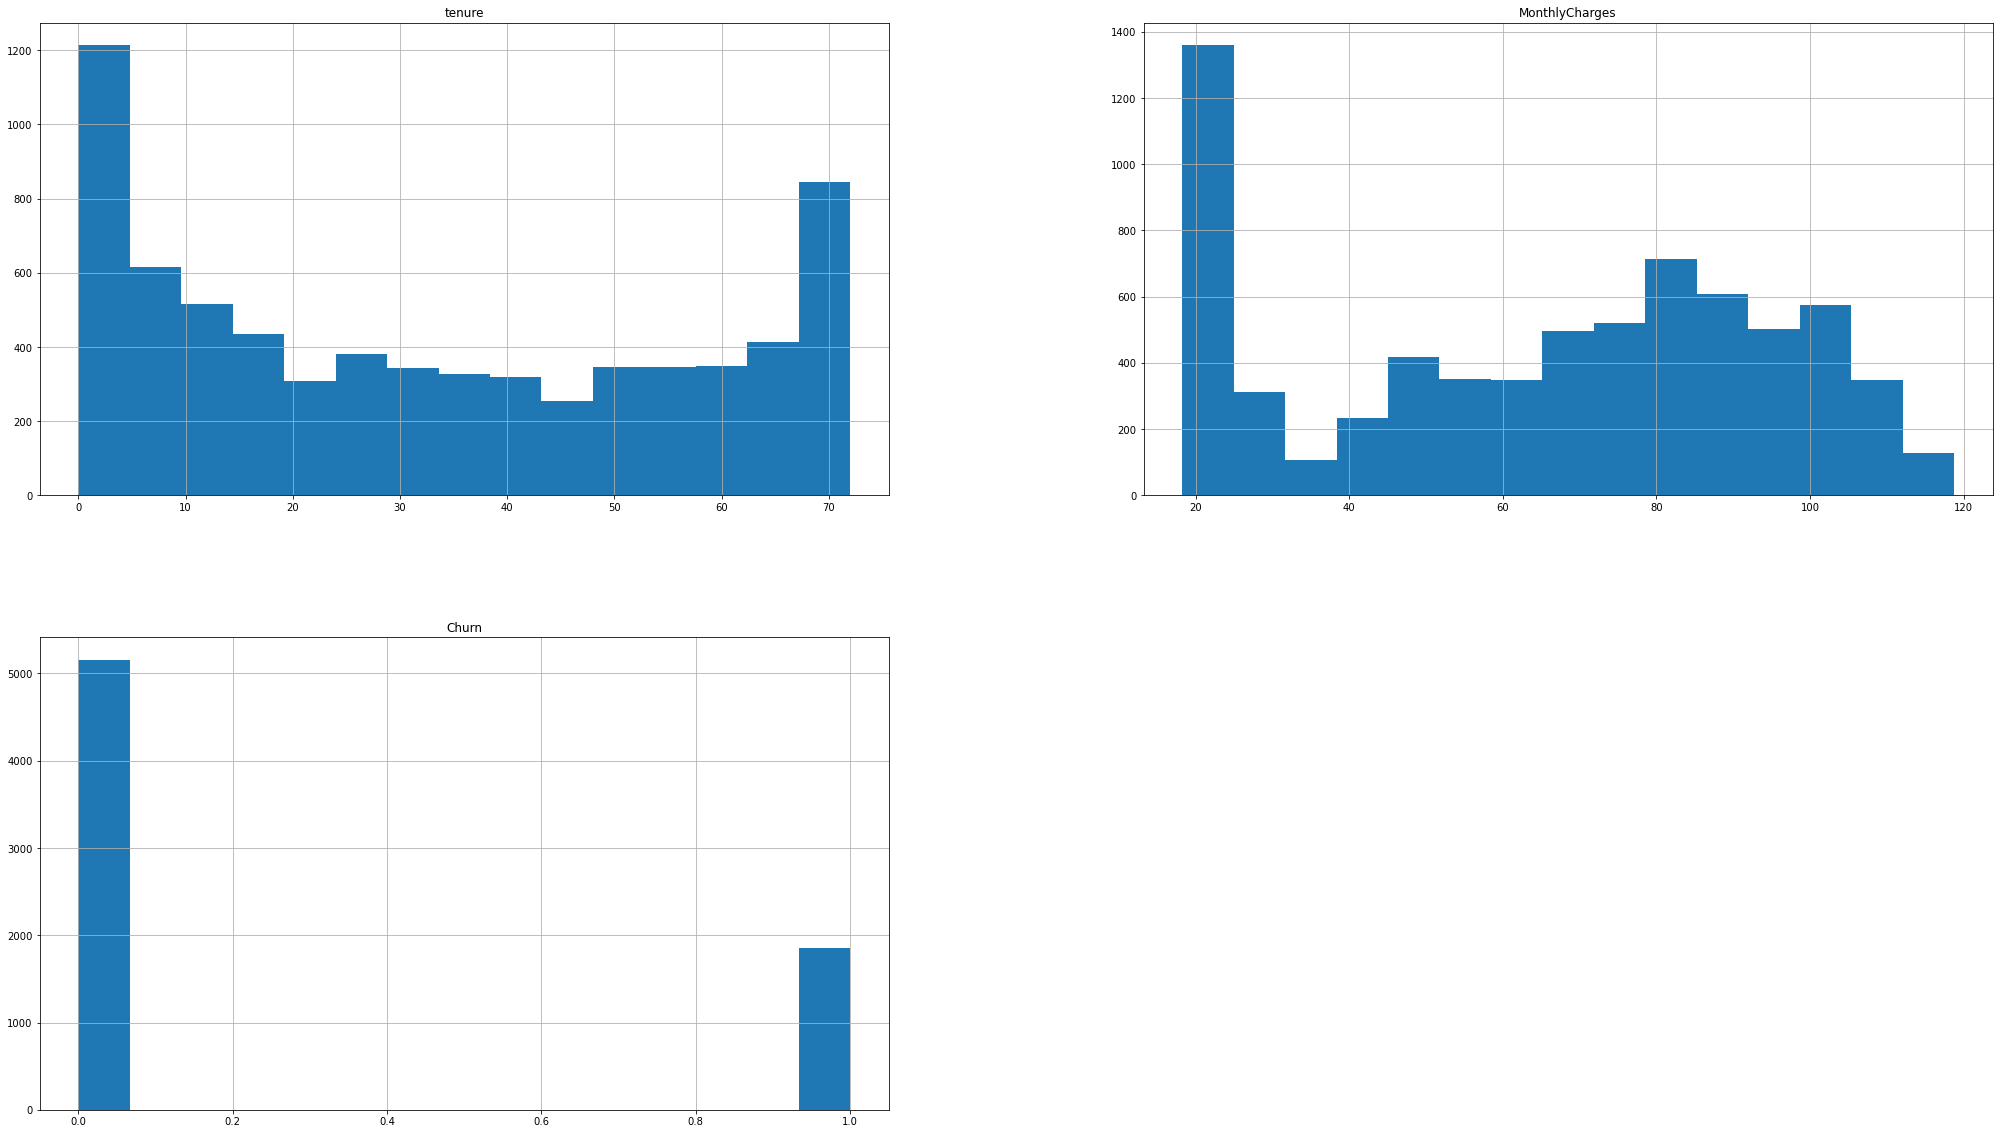

In [17]:
#checking for outliers
df.hist(figsize=(35,20),bins = 15)
plt.title("Features Distribution")
plt.show()


In [18]:
#finding continous columns
df.select_dtypes(include=["number"]).columns

Index(['tenure', 'MonthlyCharges', 'Churn'], dtype='object')

In [19]:
# reducing skewness
x = df[['tenure', 'MonthlyCharges']].copy()
x.skew()


tenure            0.235849
MonthlyCharges   -0.225186
dtype: float64

In [20]:
#Using zscore
import numpy as np
from scipy.stats import zscore

z=np.abs(zscore(x))
threshold=1
df_new=df[(z<1).all(axis=1)]

print("columns before applying zscore: ",len(df))
print("columns after applying zscore: ",len(df_new))

columns before applying zscore:  7016
columns after applying zscore:  2171


In [21]:
df=df_new

In [22]:
#removing skewness using power transform
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

x_new=pd.DataFrame(df_new,columns=x.columns)

df_new=df
x_new.skew()

tenure           -0.243570
MonthlyCharges   -0.260068
dtype: float64

In [23]:
#checking nan
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
Churn               0
dtype: int64

# 2. Dealing with categorical data

In [24]:
# a.finding the categorical datas
df.select_dtypes(exclude=["number"]).columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

# b.Undersampling and oversampling

In [25]:
#balancing class

# class count
class_count_0, class_count_1 = df['Churn'].value_counts()

#Separate class
class_0 = df[df['Churn'] == 0]
class_1 = df[df['Churn'] == 1]

print('class No/0:', class_0.shape)
print('class Yes/1:', class_1.shape)

class No/0: (1600, 19)
class Yes/1: (571, 19)


total class of 1 and 0: 
 0    571
1    571
Name: Churn, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

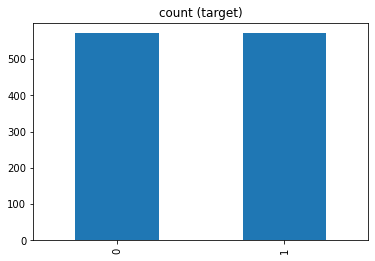

In [26]:
#performing oversampling
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0: \n",test_under['Churn'].value_counts())# plot the count after under-sampeling

test_under['Churn'].value_counts().plot(kind='bar', title='count (target)')

If we are oversampling, the accuracy score is decreasing

In [27]:
from sklearn.utils import resample

No = df[df.Churn==0]
Yes = df[df.Churn==1]

# downsample majority
no_downsampled = resample(No,
                        replace = False, # sample without replacement
                         n_samples = len(Yes), # match minority n
                        random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([no_downsampled,Yes])

# checking counts
downsampled.Churn.value_counts()

0    571
1    571
Name: Churn, dtype: int64

In [28]:
y=downsampled.Churn
x=downsampled.drop(["Churn"],axis=1)

If we are undersampling also accuracy score is decreasing, so not using the data to proceed

# c.Encoding

In [29]:
#one hot encoding on data
x=pd.get_dummies(x)
x

,tenure,MonthlyCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2656,39,59.30,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0,1,0
3691,40,63.90,1,0,1,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,0
5353,21,61.65,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1
3585,34,90.15,0,1,0,1,0,1,1,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1
5963,22,78.65,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6993,50,88.05,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0
6996,41,66.50,1,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,0,1,1,0,0,0
7009,23,81.00,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
7021,12,59.80,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,1,0,0,1,0


In [30]:
len(x.columns)

38

# Feature Selection

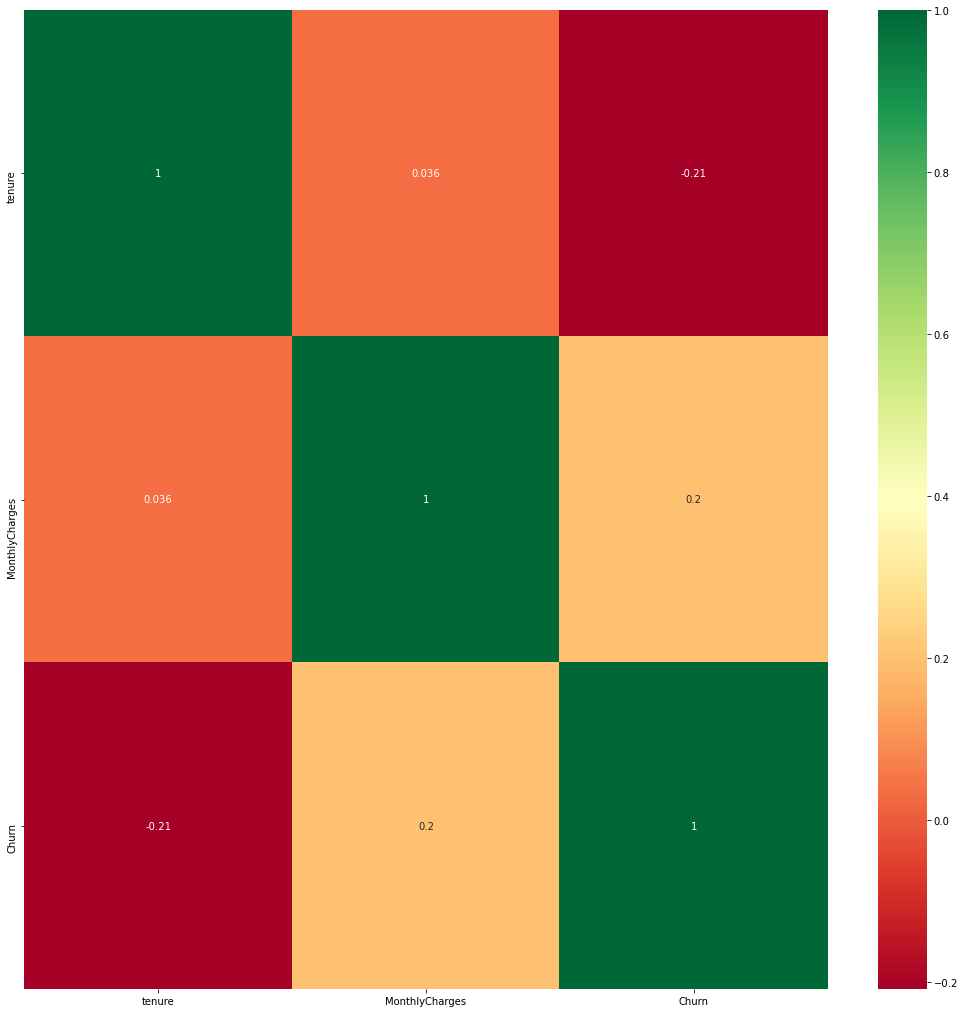

In [31]:
#heatmap
plt.figure(figsize = (18,18))
sns.heatmap(df_new.corr(), annot = True, cmap = "RdYlGn")
plt.show()

Multicollinearity is not seen

# Finding best random state

In [32]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0

for i in range(1,200):
    x_train, x_test,y_train, y_test=train_test_split(x,y,test_size=.25,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i

print("Best accuracy is", maxAccu,"on Random State",maxRS)

Best accuracy is 0.7692307692307693 on Random State 131


In [33]:

#splitting the data into train and test
from sklearn.model_selection import train_test_split

# In the first step we will split the data in training and remaining dataset
X_train, X_rem, Y_train, Y_rem = train_test_split(x,y, train_size=0.8,random_state=103)

# Now since we want the valid and test size to be equal (10% each of overall data). 
# we have to define valid_size=0.5 (that is 50% of remaining data)
test_size = 0.5
X_valid, X_test, Y_valid, Y_test = train_test_split(X_rem,Y_rem, test_size=0.5)

In [34]:
print(X_train.shape), print(Y_train.shape)
print(X_valid.shape), print(Y_valid.shape)
print(X_test.shape), print(Y_test.shape)

(913, 38)
(913,)
(114, 38)
(114,)
(115, 38)
(115,)


(None, None)

# FEATURE IMPORTANCE

,Importance
Features,
MonthlyCharges,0.155
tenure,0.129
InternetService_Fiber optic,0.051
Contract_Month-to-month,0.042
InternetService_DSL,0.031
PaymentMethod_Electronic check,0.031
gender_Female,0.023
Contract_One year,0.023
Partner_No,0.023


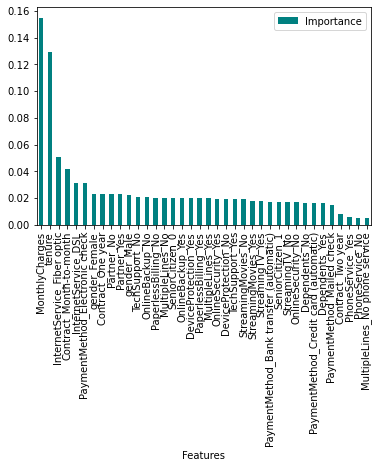

In [35]:

rf=RandomForestClassifier()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':x.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='teal')
importances

# Testing various models

**1.Training the model**

In [36]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
XGB=XGBClassifier()
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()
LR=LogisticRegression()

models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('XGBClassifier', XGB))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))
models.append(('LogisticRegression', LR))

****************************************** KNeighborsClassifier ********************************************************


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.5826086956521739


Cross_Val_Score =  0.6310606060606061


roc_auc_score =  0.5825757575757575


classification_report
               precision    recall  f1-score   support

           0       0.60      0.58      0.59        60
           1       0.56      0.58      0.57        55

    accuracy                           0.58       115
   macro avg       0.58      0.58      0.58       115
weighted avg       0.58      0.58      0.58       115



[[35 25]
 [23 32]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** DecisionTreeClassifier ********************************************************


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.5391304347826087


Cross_Val_Score =  0.5348484848484848


roc_auc_score =  0.5424242424242425


classification_repor

GradientBoostingClassifier()


Accuracy_score =  0.6869565217391305


Cross_Val_Score =  0.5522727272727272


roc_auc_score =  0.6909090909090909


classification_report
               precision    recall  f1-score   support

           0       0.75      0.60      0.67        60
           1       0.64      0.78      0.70        55

    accuracy                           0.69       115
   macro avg       0.70      0.69      0.69       115
weighted avg       0.70      0.69      0.68       115



[[36 24]
 [12 43]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



****************************************** BaggingClassifier ********************************************************


BaggingClassifier()


Accuracy_score =  0.6260869565217392


Cross_Val_Score =  0.4984848484848484


roc_auc_score =  0.6272727272727272


classification_report
               precision    recall  f1-score   support

           0       0.65      0.60      0.63        60
           1       0.60      0.65      0.6

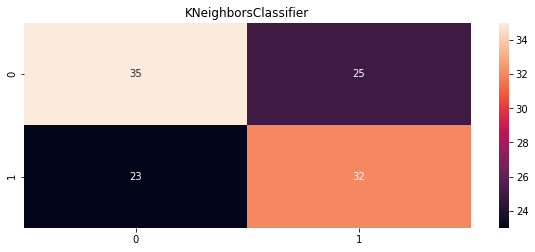

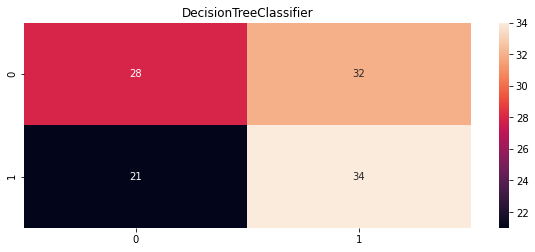

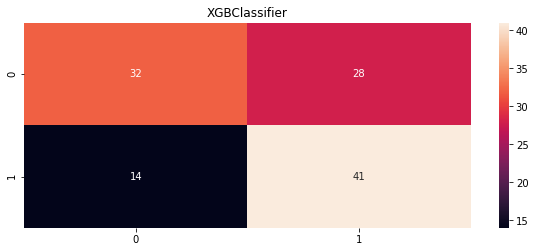

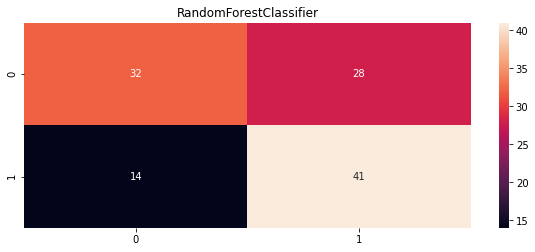

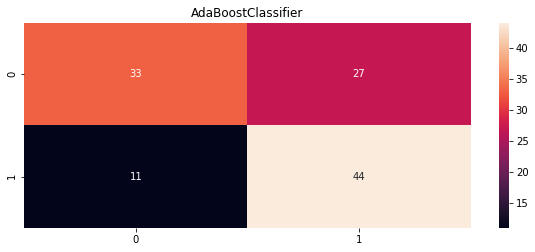

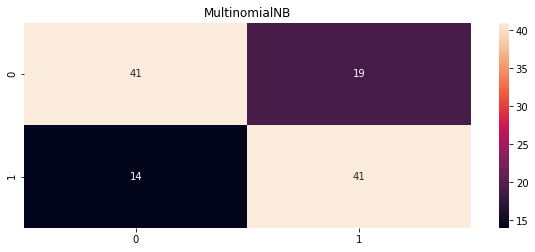

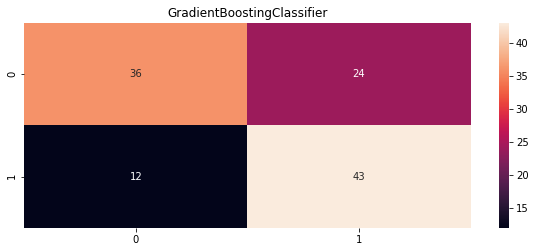

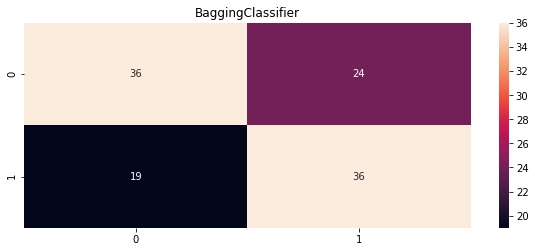

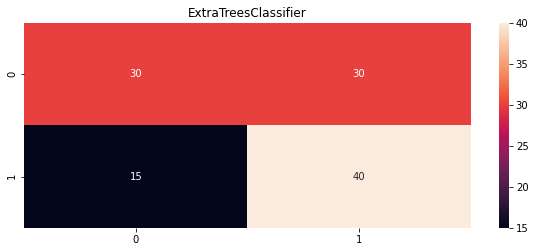

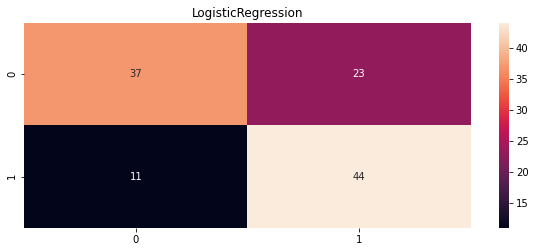

In [37]:
Model= []
score= []
cvs=[]
rocscore=[]
difference=[]
for name,model in models:
    print('******************************************',name,'********************************************************')
    print('\n')
    Model.append(name)
    model.fit(X_train,Y_train)
    print(model)
    pre=model.predict(X_test)
    print('\n')
    
    AS=accuracy_score(Y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    
    sc= cross_val_score(model, X_valid,Y_valid, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    
    
    false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score = ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    
    print('classification_report\n',classification_report(Y_test,pre))
    print('\n')
    
    cm=confusion_matrix(Y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    print('\n\n')
    diff=AS-sc
    difference.append(diff)

In [38]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs,'difference between a and c':difference,'roc_score':rocscore})
result

,Model,Accuracy_score,Cross_val_score,difference between a and c,roc_score
0,KNeighborsClassifier,58.260870,63.106061,-0.048452,58.257576
1,DecisionTreeClassifier,53.913043,53.484848,0.004282,54.242424
2,XGBClassifier,63.478261,63.030303,0.004480,63.939394
3,RandomForestClassifier,63.478261,55.227273,0.082510,63.939394
4,AdaBoostClassifier,66.956522,55.984848,0.109717,67.500000
5,MultinomialNB,71.304348,65.530303,0.057740,71.439394
6,GradientBoostingClassifier,68.695652,55.227273,0.134684,69.090909
7,BaggingClassifier,62.608696,49.848485,0.127602,62.727273
8,ExtraTreesClassifier,60.869565,58.939394,0.019302,61.363636
9,LogisticRegression,70.434783,59.696970,0.107378,70.833333


AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



[15:09:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)



AxesSubplot(0.125,0.808774;0.62x0.0712264)





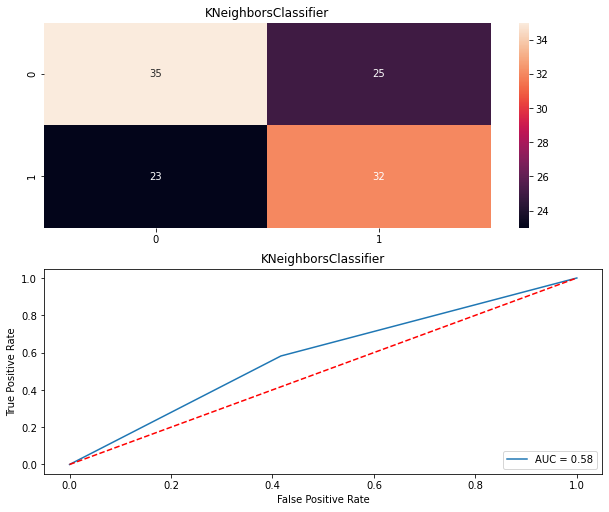

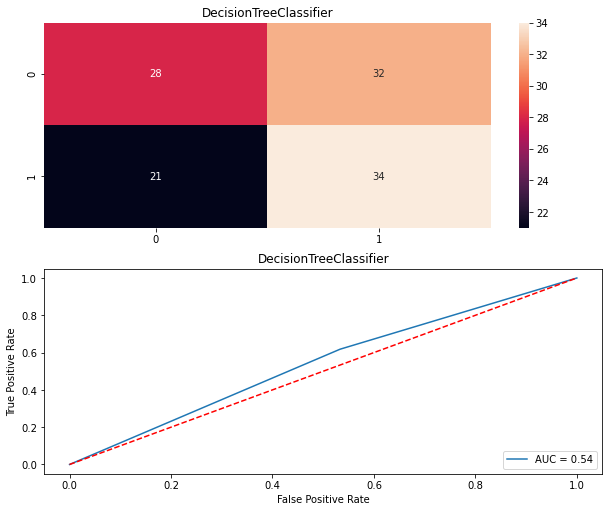

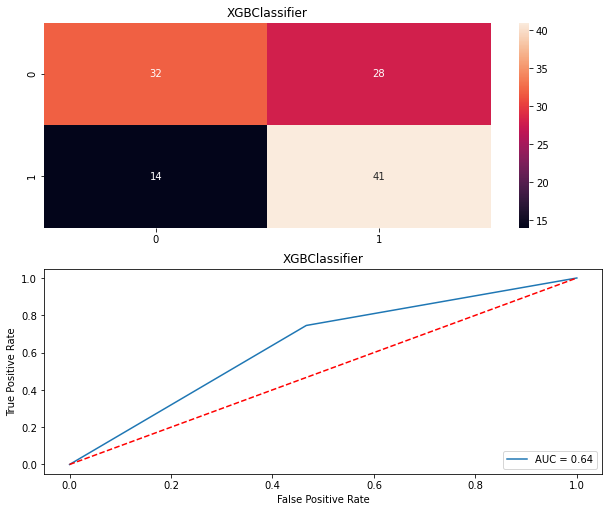

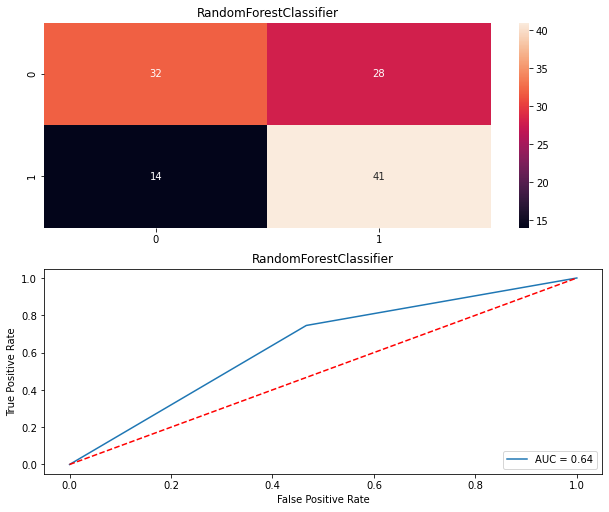

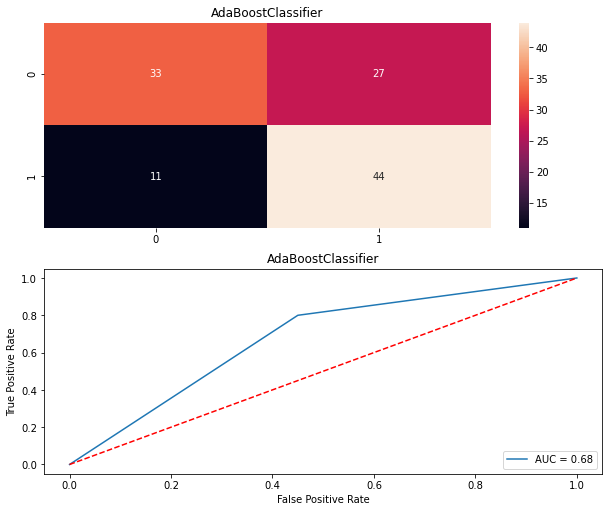

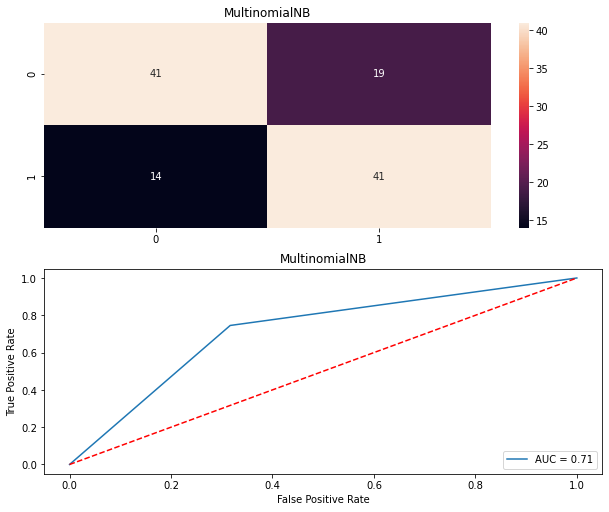

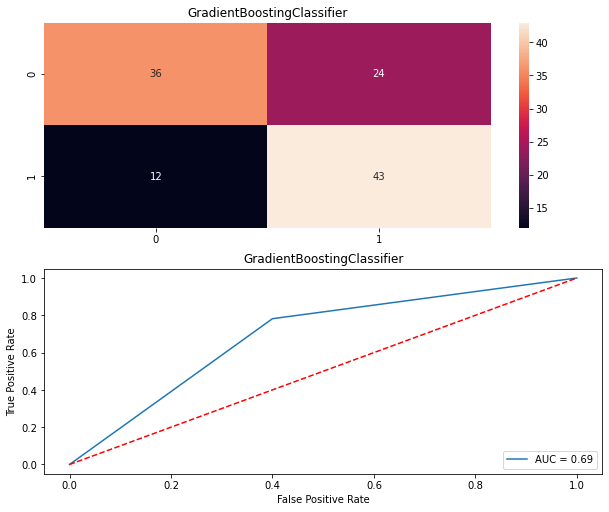

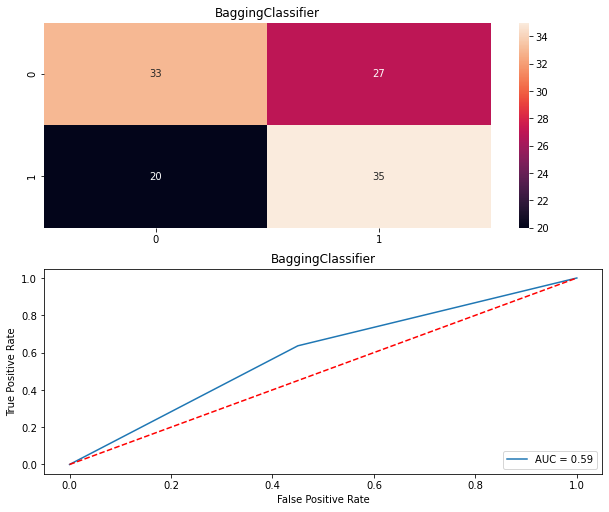

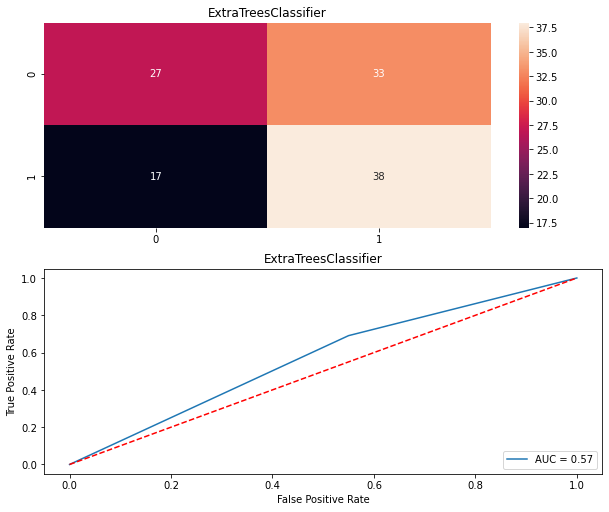

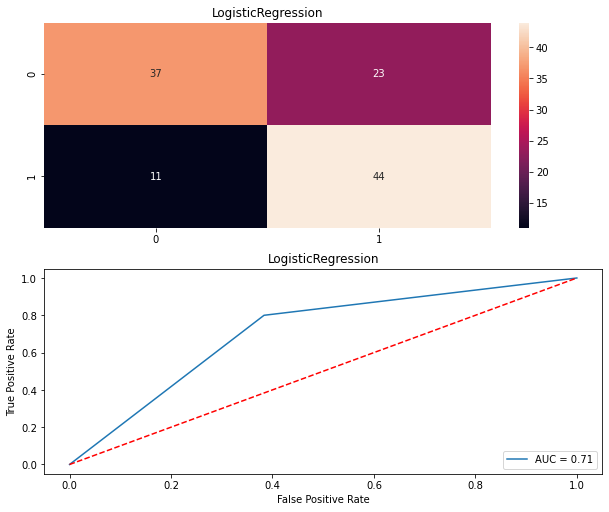

In [39]:
for name,model in models:
    model.fit(X_train,Y_train)
    pre=model.predict(X_test)

    false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    
    cm= confusion_matrix(Y_test,pre)
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# Selection of best model

<AxesSubplot:>

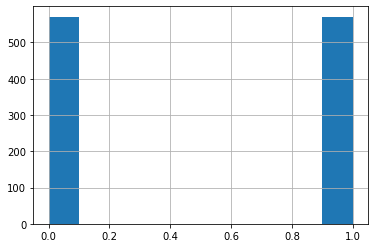

In [40]:
y.hist()

GradientBoostingClassifier has the least problem with fittin and also has high accuracy scores and roc_score

# Hyperparameter Tuning

In [41]:
#GradientBoostingClassifier
paramters={'n_estimators':[15, 20,25,30],
           'learning_rate':[0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1],
           'max_features':[1,2,3],
           'max_depth':[1,2,3],
           'random_state':[0,1,2]
           }

In [42]:
GCV=GridSearchCV(GradientBoostingClassifier(),paramters,cv=5)
GCV.fit(X_train,Y_train)
GCV.best_params_

{'learning_rate': 0.5,
 'max_depth': 2,
 'max_features': 2,
 'n_estimators': 15,
 'random_state': 0}

In [43]:
mod=GradientBoostingClassifier(learning_rate= 0.75,max_depth= 2,max_features= 1,n_estimators=30,random_state= 0)

In [44]:
mod.fit(X_train,Y_train)
pred=mod.predict(X_test)
print(accuracy_score(Y_test,pred)*100)

70.43478260869566


Accuracy obtained is 70.84 %

AxesSubplot(0.125,0.808774;0.62x0.0712264)





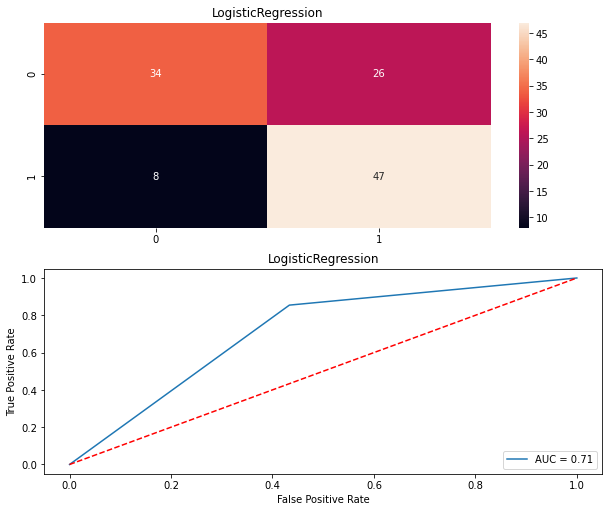

In [47]:
mod.fit(X_train,Y_train)
pre=mod.predict(X_test)

false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)

cm= confusion_matrix(Y_test,pre)
plt.figure(figsize=(10,40))
plt.subplot(911)
plt.title(name)
print(sns.heatmap(cm,annot=True))
plt.subplot(912)
plt.title(name)
plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
print('\n\n')

In [54]:
score_final_model=[]
cvs_final_model=[]
rocscore_final_model=[]

pre=mod.predict(X_test)

AS=accuracy_score(Y_test,pre)
score_final_model.append(AS*100)


sc= cross_val_score(model, X_test,Y_test, cv=10, scoring='accuracy').mean()
cvs_final_model.append(sc*100)


false_positive_rate, true_positive_rate,thresolds= roc_curve(Y_test,pre)
roc_auc=auc(false_positive_rate,true_positive_rate)
rocscore_final_model.append(roc_auc*100)


print('classification_report\n',classification_report(Y_test,pre))
print('\n')

print("Score of the finalized model:")
final_model_scores=data = pd.DataFrame({'Accuracy score':score_final_model,'cross validation score':cvs_final_model,'ROC Score':rocscore_final_model})

from IPython.display import HTML
HTML(final_model_scores.to_html(index=False))

classification_report
               precision    recall  f1-score   support

           0       0.81      0.57      0.67        60
           1       0.64      0.85      0.73        55

    accuracy                           0.70       115
   macro avg       0.73      0.71      0.70       115
weighted avg       0.73      0.70      0.70       115



Score of the finalized model:


Accuracy score,cross validation score,ROC Score
70.434783,68.712121,71.060606
